# Data Exploration

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#load data from files
loan = pd.read_csv(r"C:\Users\spies\Downloads\loan_data.csv")
loan

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [3]:
#check for categorical features and missing values in each feature
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
#brief overview of each feature
loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


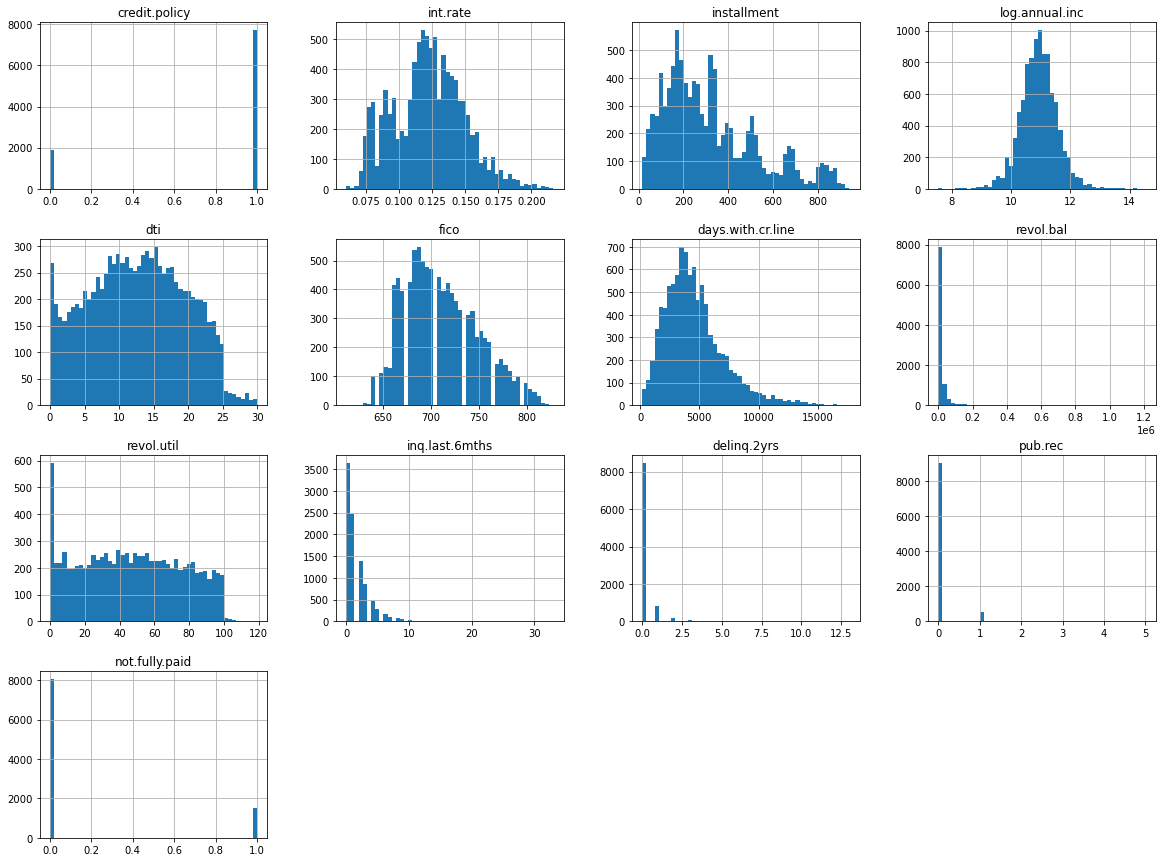

In [5]:
#graph of each feature
loan.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:>

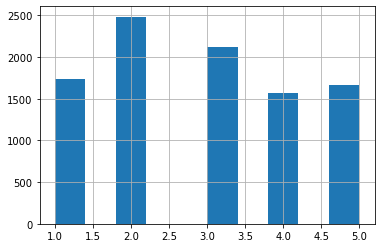

In [6]:
#stratify data using 'fico' feature
loan['fico_cat'] = pd.cut(loan['fico'],bins=[0,675,700,725,750,850],labels=[1,2,3,4,5])
loan['fico_cat'].hist()

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)
for train_index, test_index in split.split(loan, loan['fico_cat']):
    strat_train_set = loan.loc[train_index]
    strat_test_set = loan.loc[test_index]

In [8]:
#check distribution
strat_train_set['fico_cat'].value_counts()/len(strat_train_set)

2    0.259462
3    0.221613
1    0.181284
5    0.174367
4    0.163273
Name: fico_cat, dtype: float64

In [9]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('fico_cat',axis=1, inplace=True)

In [10]:
#check correlation between credit.policy and other featuers
corr_matrix = loan.corr()
corr_matrix['credit.policy'].sort_values(ascending=False)

credit.policy        1.000000
fico                 0.348319
days.with.cr.line    0.099026
installment          0.058770
log.annual.inc       0.034906
pub.rec             -0.054243
delinq.2yrs         -0.076318
dti                 -0.090901
revol.util          -0.104095
not.fully.paid      -0.158119
revol.bal           -0.187518
int.rate            -0.294089
inq.last.6mths      -0.535511
Name: credit.policy, dtype: float64

array([[<AxesSubplot:xlabel='not.fully.paid', ylabel='not.fully.paid'>,
        <AxesSubplot:xlabel='fico', ylabel='not.fully.paid'>,
        <AxesSubplot:xlabel='days.with.cr.line', ylabel='not.fully.paid'>,
        <AxesSubplot:xlabel='int.rate', ylabel='not.fully.paid'>,
        <AxesSubplot:xlabel='inq.last.6mths', ylabel='not.fully.paid'>],
       [<AxesSubplot:xlabel='not.fully.paid', ylabel='fico'>,
        <AxesSubplot:xlabel='fico', ylabel='fico'>,
        <AxesSubplot:xlabel='days.with.cr.line', ylabel='fico'>,
        <AxesSubplot:xlabel='int.rate', ylabel='fico'>,
        <AxesSubplot:xlabel='inq.last.6mths', ylabel='fico'>],
       [<AxesSubplot:xlabel='not.fully.paid', ylabel='days.with.cr.line'>,
        <AxesSubplot:xlabel='fico', ylabel='days.with.cr.line'>,
        <AxesSubplot:xlabel='days.with.cr.line', ylabel='days.with.cr.line'>,
        <AxesSubplot:xlabel='int.rate', ylabel='days.with.cr.line'>,
        <AxesSubplot:xlabel='inq.last.6mths', ylabel='days.with.cr.

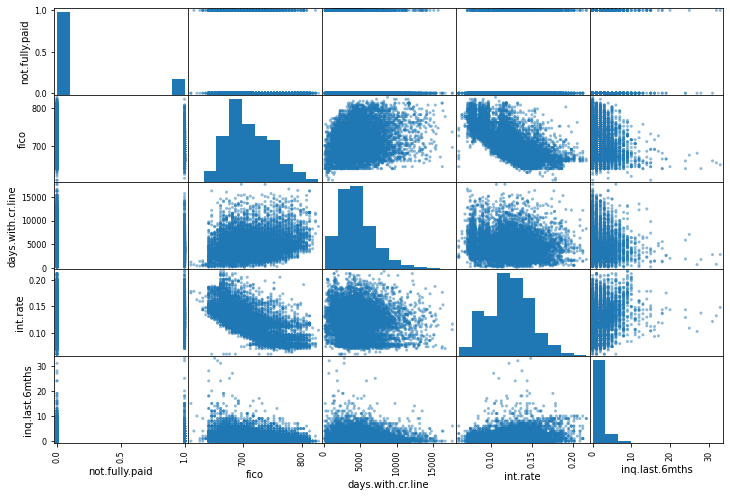

In [11]:
#graph corrleations
from pandas.plotting import scatter_matrix
attributes = ["not.fully.paid","fico","days.with.cr.line","int.rate","inq.last.6mths"]
scatter_matrix(loan[attributes], figsize=(12,8))

<AxesSubplot:xlabel='fico', ylabel='credit.policy'>

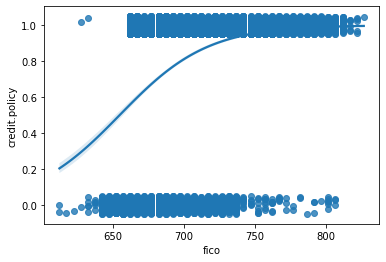

In [12]:
import seaborn as sns
sns.regplot(x='fico', y='credit.policy', data=loan, y_jitter=.05, logistic=True)

<AxesSubplot:xlabel='int.rate', ylabel='credit.policy'>

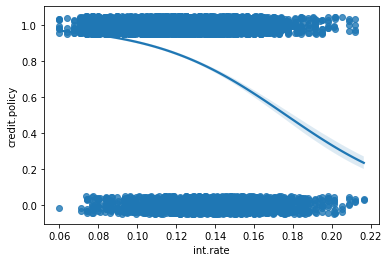

In [13]:
sns.regplot(x='int.rate', y='credit.policy', data=loan, y_jitter=.05, logistic=True)

In [14]:
#split features and label
loan = strat_train_set.drop('credit.policy',axis=1)
loan_labels = strat_train_set['credit.policy'].copy()

In [15]:
#use mean to fill in empty cells
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
loan_num = loan.drop('purpose', axis=1)
imputer.fit(loan_num)
imputer.statistics_

array([1.22550000e-01, 2.69545000e+02, 1.09205265e+01, 1.26750000e+01,
       7.07000000e+02, 4.14000000e+03, 8.53850000e+03, 4.62000000e+01,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [16]:
#use 1hot encoder for categorical features
from sklearn.preprocessing import OneHotEncoder
loan_cat = loan[["purpose"]]
loan_cat.head(10)
cat_encoder = OneHotEncoder()
loan_cat_1hot = cat_encoder.fit_transform(loan_cat)
loan_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [17]:
#form numerical pipeline
import sklearn.pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'median')),('std_scaler',StandardScaler())])

In [18]:
#form full pipeline with numerical and categorical features
from sklearn.compose import ColumnTransformer
num_attribs = list(loan_num)
cat_attribs = ['purpose']
full_pipeline = ColumnTransformer([('num', num_pipeline, num_attribs),('cat', OneHotEncoder(),cat_attribs)])
loan_prepared = full_pipeline.fit_transform(loan)

In [19]:
#save data to files
from numpy import savetxt
np.savetxt('loan_prepared.txt', loan_prepared)
np.savetxt('loan_labels.txt', loan_labels)

In [20]:
#separate test data
test_features = strat_test_set.drop('credit.policy', axis=1)
test_labels = strat_test_set['credit.policy'].copy()

In [21]:
#convert and save test set
test_features = full_pipeline.fit_transform(test_features)
np.savetxt('test_features.txt', test_features)
np.savetxt('test_labels.txt', test_labels)